### Mounted Drive

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Storing data path from google drive

In [138]:
data_path = "/content/drive/MyDrive/Animals"

### Imported essential libraries

In [139]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import os

### Loaded Preprocess dataset

In [140]:
train_data = []
categories = os.listdir(data_path)

### Image read and Image Preprocessing: Each image converted into gray scale and Resized or Reshaped each image to fixed size

100%|██████████| 38/38 [00:00<00:00, 79.87it/s]


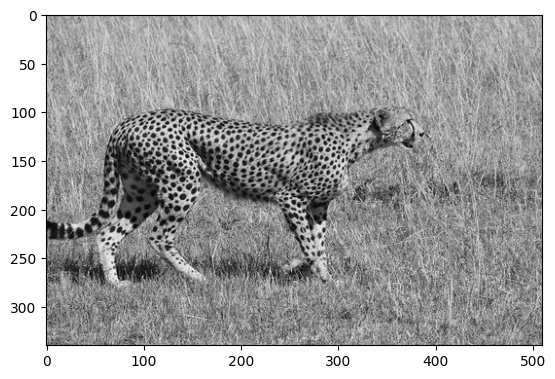

In [141]:
for c in categories:
  path = os.path.join(data_path, c)
  class_index = categories.index(c)
  for img in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, img))
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_arr, cmap = 'gray') # Converted into gray scale
    img_arr = cv2.resize(img_arr, (200,208)) # Resize or Reshape to fixed size
    train_data.append([img_arr, class_index, c])

### Printed categories name for each data

In [142]:
for i in range(len(train_data)):
  print(train_data[i][2])

Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Tiger
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Jaguar
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Lion
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Leopard
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Cheetah
Chee

### Visualized all image with their categories name of dataset

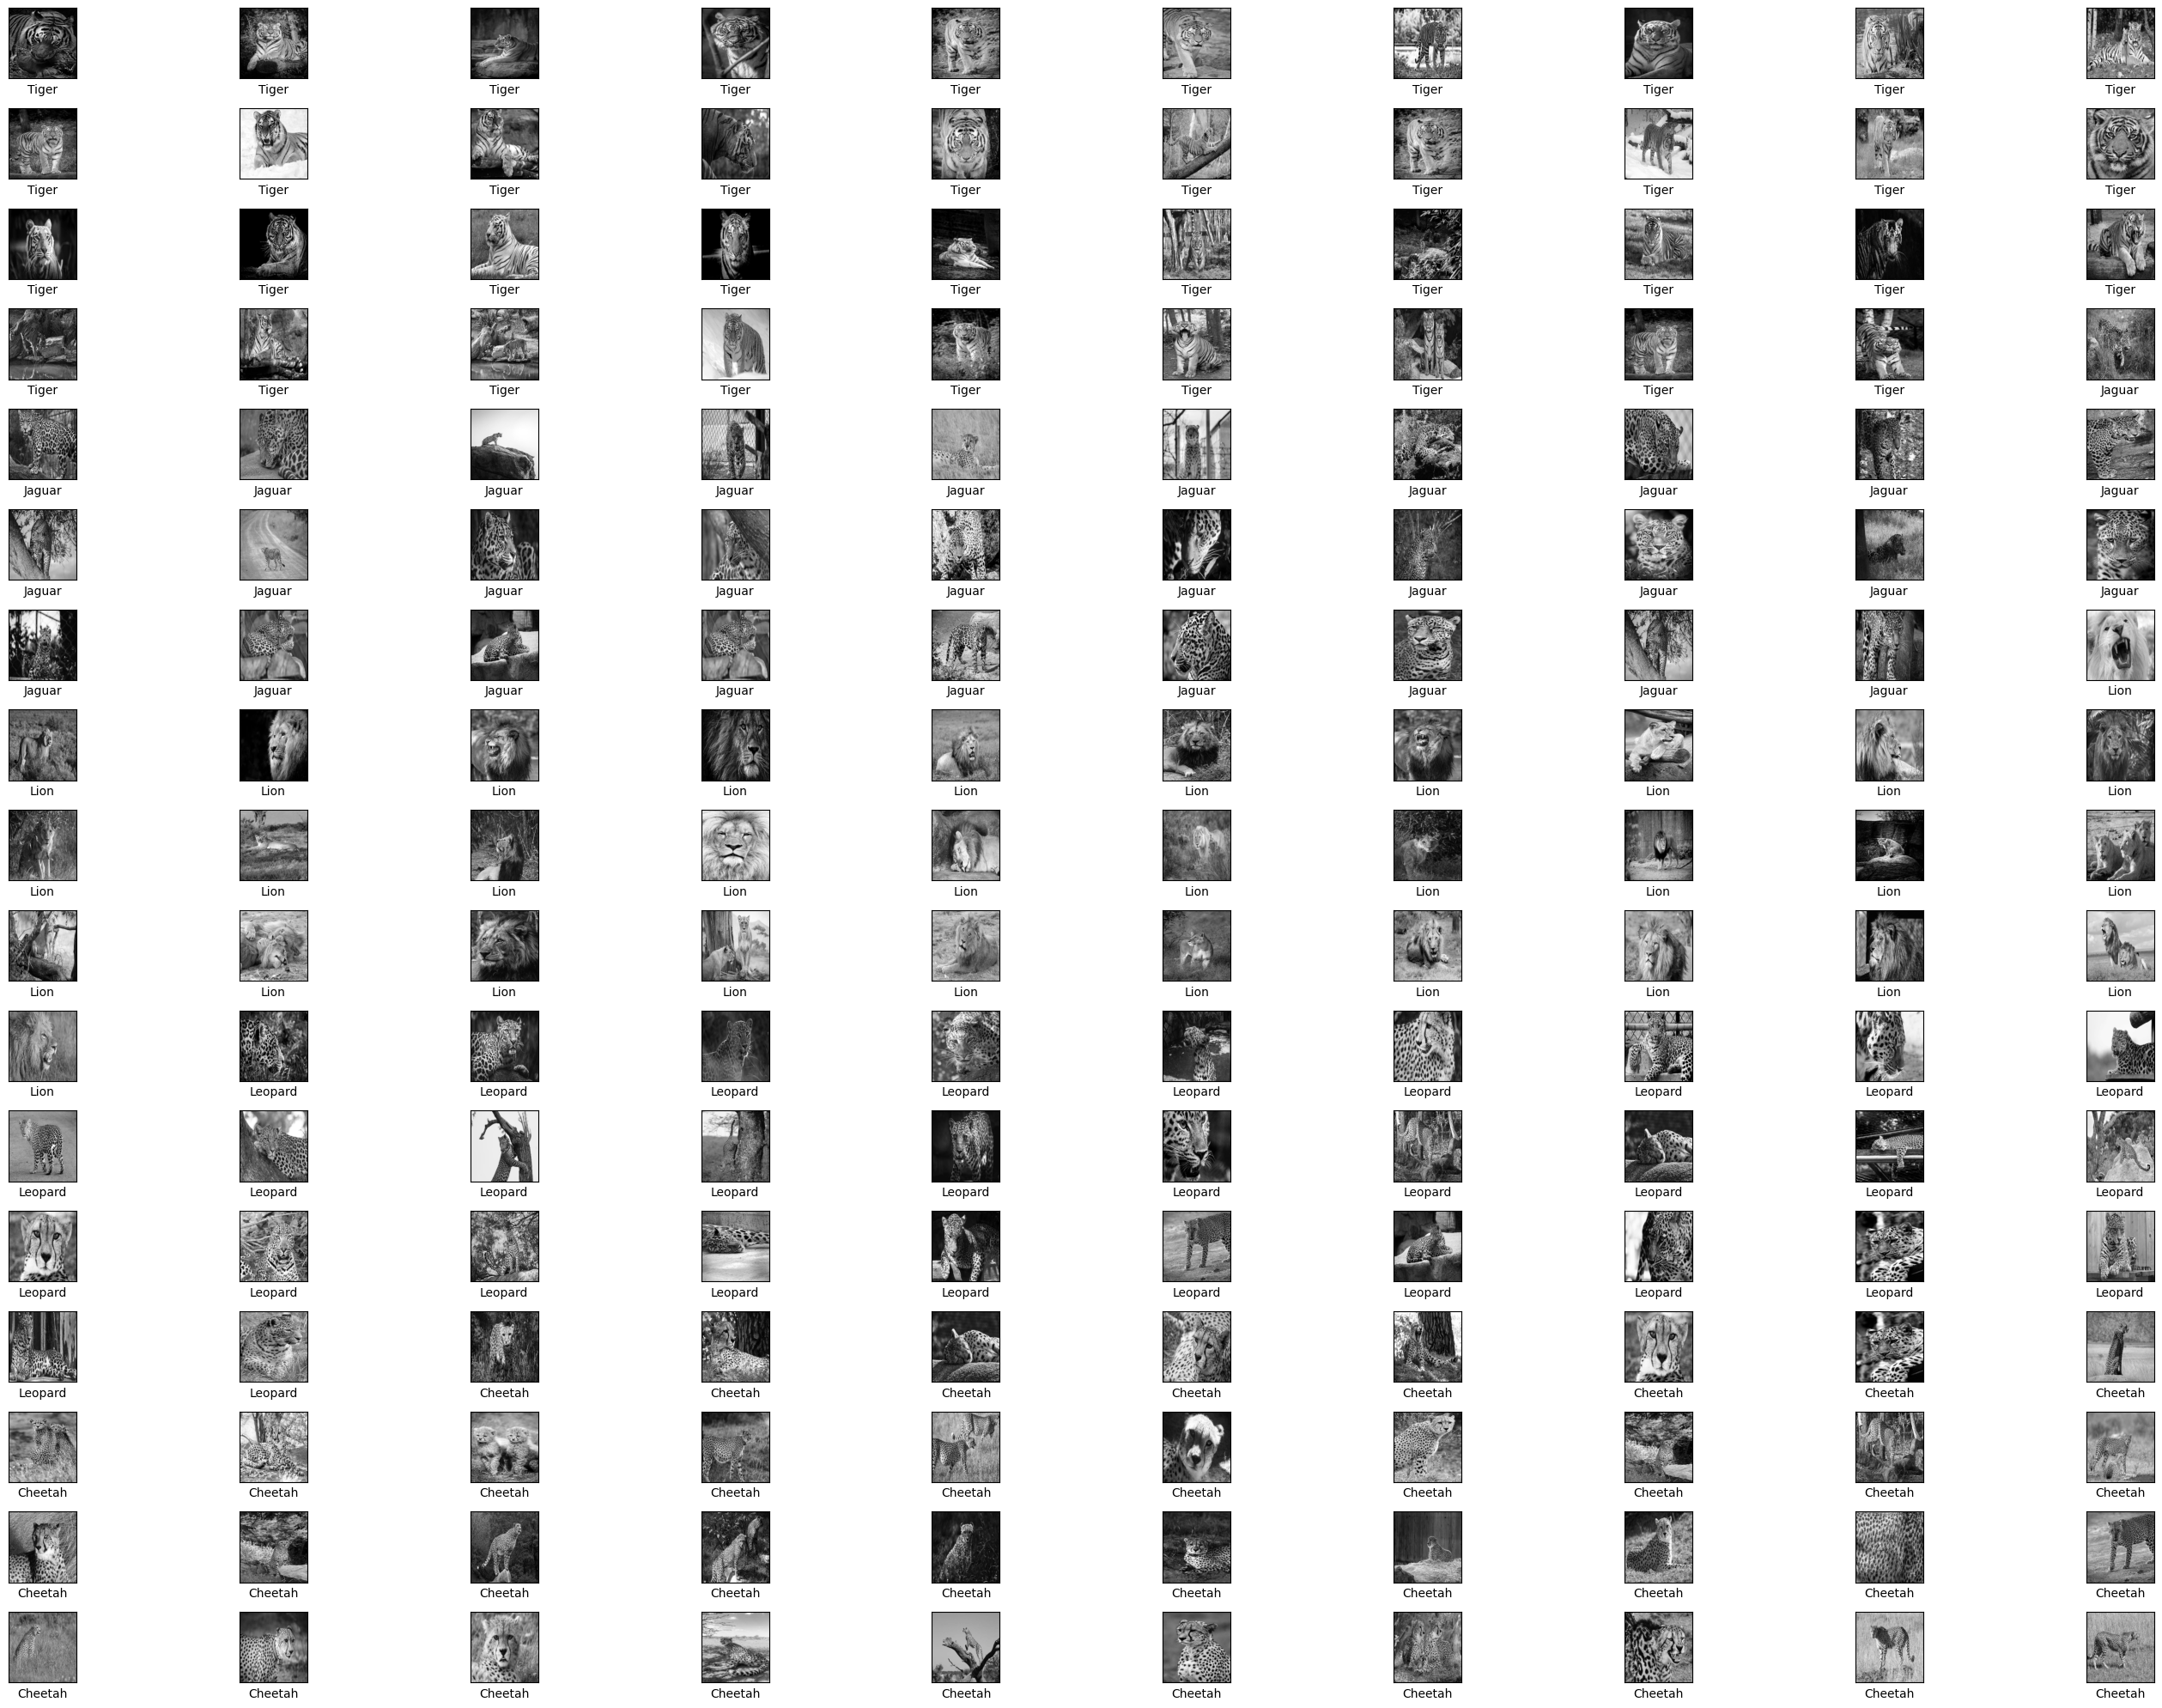

In [143]:
i = 0
plt.figure(figsize=(30, 20))
for r in range(17):
  for c in range(10):
    plt.subplot(17, 10, i+1)
    plt.imshow(train_data[i][0], cmap = 'gray')
    plt.xlabel(train_data[i][2])
    i += 1
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

### Shuffle data for better cross-validation splits

In [144]:
np.random.shuffle(train_data) # Shuffle data

### Separate features and labels and Printing Total image data and image labels

In [145]:
data = np.array([item[0] for item in train_data]) # Separate features
labels = np.array([item[1] for item in train_data]) # Separate labels

print("Total image data:", len(data))
print("Total image labels:", len(labels))

Total image data: 170
Total image labels: 170


### Function to compute Euclidean distance

In [146]:
# Return Euclidean distance result
def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

### Function to find the most common label

In [147]:
def most_common_label(neighbors):
    label_counts = {}
    for label in neighbors:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    # Return the label with the highest count
    max_count = -1
    most_common = None
    for label, count in label_counts.items():
        if count > max_count:
            max_count = count
            most_common = label
    return most_common

### Function to perform k-NN classification

In [148]:
def knn_classify(train_data, train_labels, validation_instance, k):
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(train_data[i], validation_instance)
        distances.append((dist, train_labels[i]))
    distances = sorted(distances, key=lambda x: x[0])
    k_neighbors = [distances[i][1] for i in range(k)]
    return most_common_label(k_neighbors)  # Find the most common label

### Function to perform 5-fold cross-validation

In [149]:
def cross_validation(data, labels, k_values, num_folds=5):
    fold_size = len(data) // num_folds
    average_accuracies = []

    for k in k_values:
        fold_accuracies = []
        for fold in range(num_folds):
            # Split data into train and validation sets
            start, end = fold * fold_size, (fold + 1) * fold_size
            X_valid, y_valid = data[start:end], labels[start:end]
            X_train = np.concatenate((data[:start], data[end:]), axis=0)
            y_train = np.concatenate((labels[:start], labels[end:]), axis=0)

            # Evaluate the fold
            correct_predictions = 0
            for i in range(len(X_valid)):
                predicted_label = knn_classify(X_train, y_train, X_valid[i], k)
                if predicted_label == y_valid[i]:
                    correct_predictions += 1
            accuracy = correct_predictions / len(X_valid)
            fold_accuracies.append(accuracy)

        # Average accuracy for current K
        average_accuracies.append(np.mean(fold_accuracies))

    return average_accuracies

### Showing plot for Accuracy vs K (5-Fold Cross Validation) and Printing centroid (mean) accuracy

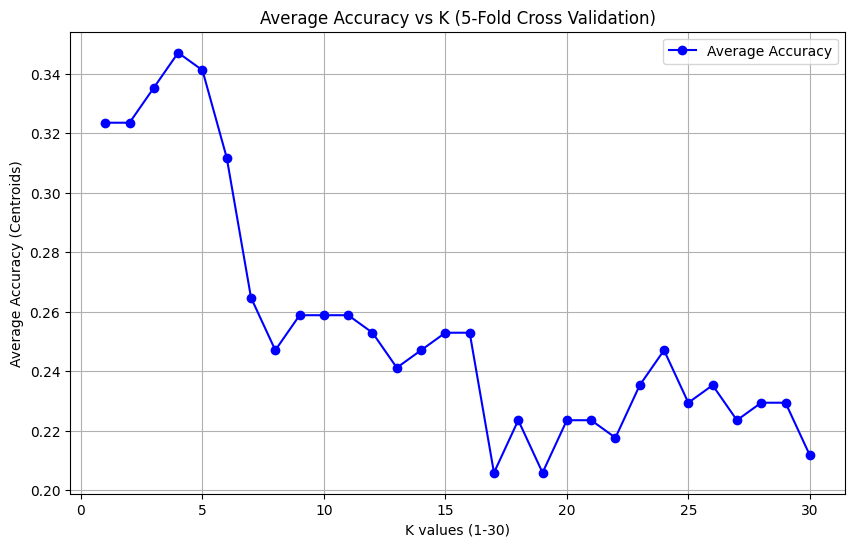

K = 1, Average Accuracy (Mean) = 0.3235
K = 2, Average Accuracy (Mean) = 0.3235
K = 3, Average Accuracy (Mean) = 0.3353
K = 4, Average Accuracy (Mean) = 0.3471
K = 5, Average Accuracy (Mean) = 0.3412
K = 6, Average Accuracy (Mean) = 0.3118
K = 7, Average Accuracy (Mean) = 0.2647
K = 8, Average Accuracy (Mean) = 0.2471
K = 9, Average Accuracy (Mean) = 0.2588
K = 10, Average Accuracy (Mean) = 0.2588
K = 11, Average Accuracy (Mean) = 0.2588
K = 12, Average Accuracy (Mean) = 0.2529
K = 13, Average Accuracy (Mean) = 0.2412
K = 14, Average Accuracy (Mean) = 0.2471
K = 15, Average Accuracy (Mean) = 0.2529
K = 16, Average Accuracy (Mean) = 0.2529
K = 17, Average Accuracy (Mean) = 0.2059
K = 18, Average Accuracy (Mean) = 0.2235
K = 19, Average Accuracy (Mean) = 0.2059
K = 20, Average Accuracy (Mean) = 0.2235
K = 21, Average Accuracy (Mean) = 0.2235
K = 22, Average Accuracy (Mean) = 0.2176
K = 23, Average Accuracy (Mean) = 0.2353
K = 24, Average Accuracy (Mean) = 0.2471
K = 25, Average Accuracy 

In [150]:
k_values = range(1, 31) # Define range of K values between 1 to 30

# Perform cross-validation for all K values
average_accuracies = cross_validation(data, labels, k_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o', color='blue', label="Average Accuracy")
plt.xlabel('K values (1-30)')
plt.ylabel('Average Accuracy (Centroids)')
plt.title('Average Accuracy vs K (5-Fold Cross Validation)')
plt.grid(True)
plt.legend()
plt.show()

# Print the Average Accuracy (centroid or mean) points for accuracy
for k, acc in zip(k_values, average_accuracies):
    print(f"K = {k}, Average Accuracy (Mean) = {acc:.4f}")